In [66]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [3]:
#Connect with google drive
#Reading the data
data = pd.read_csv('/content/drive/MyDrive/Datasets/telecom_churn_data.csv')

In [4]:
#Data overview
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
data.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [6]:
#Shape
data.shape

(3333, 11)


#### Data Description

<b> Churn </b>: 1 if customer cancelled service, 0 if not (Target)  \
<b> AccountWeeks </b> : number of weeks customer has had active account  \
<b> ContractRenewal </b>: 1 if customer recently renewed contract, 0 if not  \
<b> DataPlan </b>: 1 if customer has data plan, 0 if not  \
<b> DataUsage </b>: gigabytes of monthly data usage  \
<b> CustServCalls </b>: number of calls into customer service  \
<b> DayMins </b> : average daytime minutes per month  \
<b> DayCalls </b> : average number of daytime calls  \
<b> MonthlyCharge </b> : average monthly bill  \
<b> OverageFee </b> : largest overage fee in last 12 months  \
<b> RoamMins </b>  : average number of roaming minutes  


In [15]:
#Columns
columns = data.columns

discrete_columns = ['Churn','ContractRenewal','DataPlan','CustServCalls']
continous_columns = [column for column in columns if column not in discrete_columns]


In [48]:
continous_columns

['AccountWeeks',
 'DataUsage',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [9]:
#Data description
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


* We have active account for 1 week  to 243 weeks.
* The monthly mean data usage is 0.82 GB.
* Maximum customer service call is of 9 times.
* Approx 180 mins is being called by customer in a month.
* On an average 100 Calls is made in a month.
* The monthly mean charge is of 56 units.
* The mean overage fee is of 10 units and Maximum is of 18 units.
* Mean roaming minutes in a months is 10 mins.

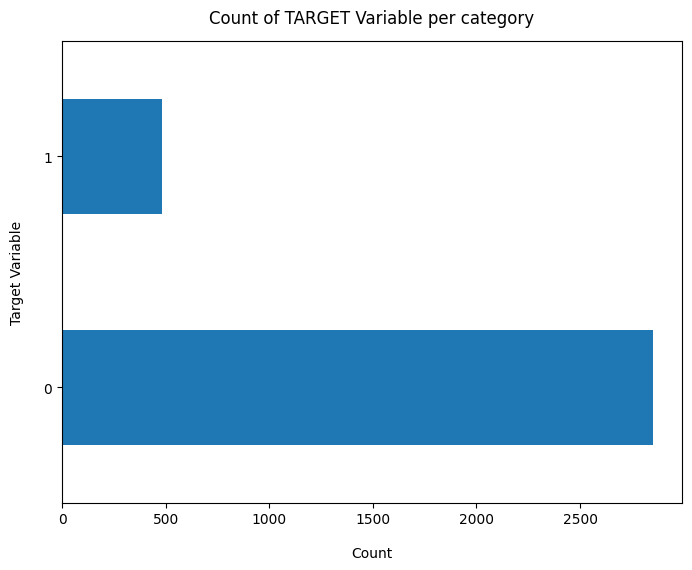

In [25]:
data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [27]:
#percentage of churn  or not
data['Churn'].value_counts() / len(data['Churn'])

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [28]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

* Highly unbalanced data , as we have 86% of customers who have not churned and 14 % customers who have churned.

In [45]:
df = data.copy()

In [46]:
#Data Cleaning
#based on the domain knowledge we can excute the below code
#impure_data = df[(df['DataUsage'] > 0.0) & (df['DataPlan'] == 0)]
#df = df.drop(impure_data.index)

In [56]:
discrete_columns

['Churn', 'ContractRenewal', 'DataPlan', 'CustServCalls']

<Axes: xlabel='ContractRenewal', ylabel='count'>

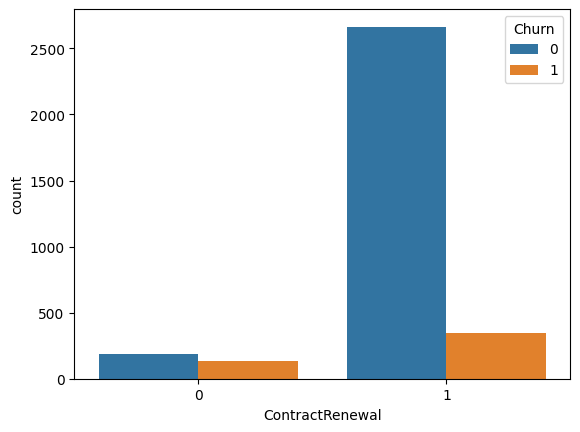

In [55]:
sns.countplot(data = df, x = df['ContractRenewal'], hue = 'Churn')

<Axes: xlabel='DataPlan', ylabel='count'>

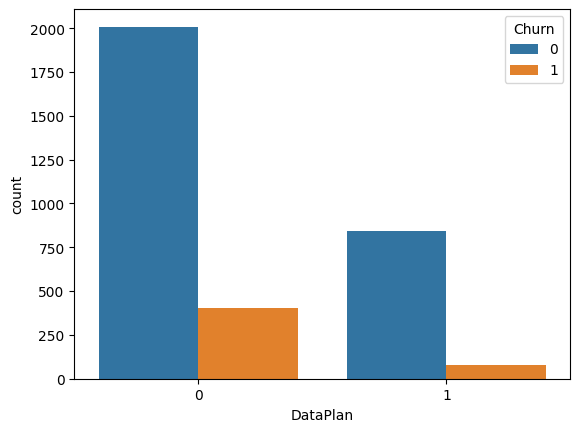

In [57]:
sns.countplot(data = df, x = df['DataPlan'], hue = 'Churn')

<Axes: xlabel='CustServCalls', ylabel='count'>

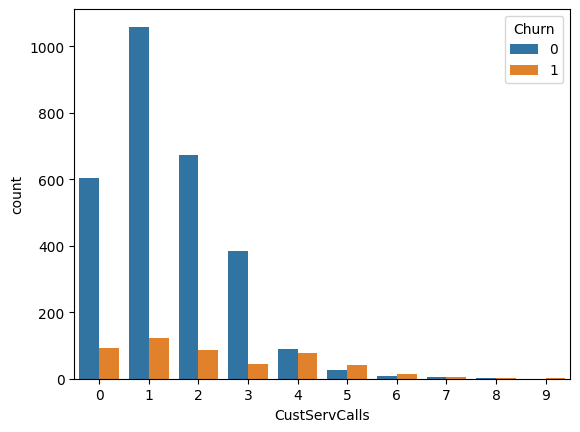

In [59]:
sns.countplot(data = df, x = df['CustServCalls'], hue = 'Churn')

* We need to make groups for different numbers of Customers service calls
* Need to analyse the data plan customers.
* Absence of Contract Renewal seems to more influenced for churning

In [60]:
continous_columns

['AccountWeeks',
 'DataUsage',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

In [73]:
df['AccountWeeks'].value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: AccountWeeks, Length: 212, dtype: int64

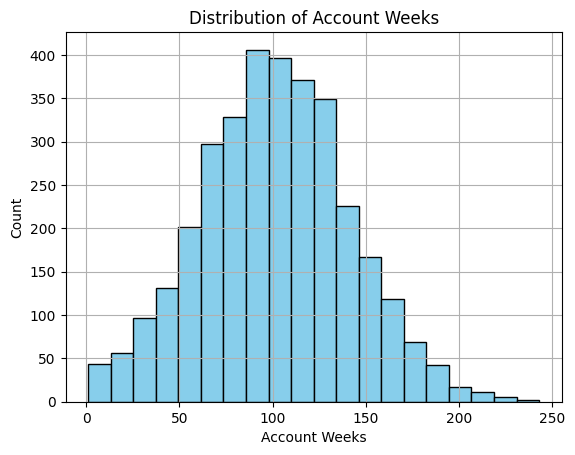

In [74]:
import matplotlib.pyplot as plt

# Plotting the distribution of AccountWeeks
plt.hist(df['AccountWeeks'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Account Weeks')
plt.ylabel('Count')
plt.title('Distribution of Account Weeks')
plt.grid(True)
plt.show()


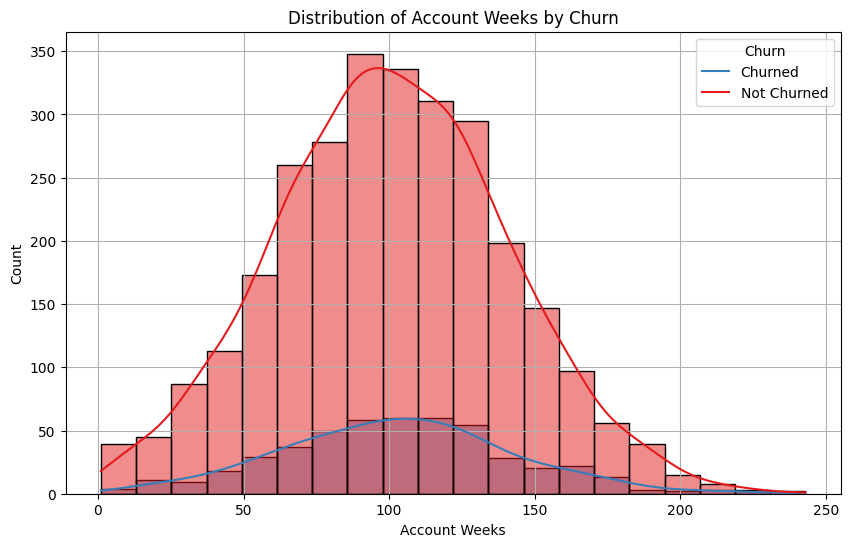

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of AccountWeeks with respect to Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AccountWeeks', hue='Churn', bins=20, kde=True, palette='Set1', edgecolor='black')
plt.xlabel('Account Weeks')
plt.ylabel('Count')
plt.title('Distribution of Account Weeks by Churn')
plt.grid(True)
plt.legend(title='Churn', labels=['Churned', 'Not Churned'])
plt.show()
